In [1]:
!pip install scikit-learn

In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,FunctionTransformer,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from datetime import datetime as dt
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_log_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
tr_data=pd.read_csv("/content/drive/MyDrive/Project3_Smart_Premium/train.csv")

In [ ]:
tr_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [ ]:
ts_data=pd.read_csv("/content/drive/MyDrive/Project3_Smart_Premium/test.csv")

In [ ]:
ts_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [ ]:
tar_var=pd.read_csv("/content/drive/MyDrive/Project3_Smart_Premium/sample_submission.csv")

In [ ]:
tar_var

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545
...,...,...
799995,1999995,1102.545
799996,1999996,1102.545
799997,1999997,1102.545
799998,1999998,1102.545


In [ ]:
tar_var.isnull().sum()

id                0
Premium Amount    0
dtype: int64

In [ ]:
tr_data.shape

(1200000, 21)

In [ ]:
tr_data.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [ ]:
tr_data.dtypes

,0
id,int64
Age,float64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,float64
Education Level,object
Occupation,object
Health Score,float64
Location,object


In [ ]:
tr_data["Number of Dependents"].value_counts()

,count
Number of Dependents,
3.0,221475
4.0,220340
0.0,218124
2.0,215313
1.0,215076


In [ ]:
tr_data["Annual Income"].value_counts()

,count
Annual Income,
7073.0,1039
16054.0,1019
14094.0,916
24897.0,914
15983.0,888
...,...
2034.0,1
34216.0,1
126010.0,1


In [ ]:
tr_data["Credit Score"].median()

595.0

In [ ]:
tr_data['Credit Score']

,Credit Score
0,372.0
1,694.0
2,NaN
3,367.0
4,598.0
...,...
1199995,372.0
1199996,597.0
1199997,NaN
1199998,407.0


In [ ]:
tr_data['Annual Income'].mean()

np.float64(32745.21777653108)

In [ ]:
tr_data['Annual Income'].median()

23911.0

In [ ]:
tr_data['Customer Feedback'].mode()

,Customer Feedback
0,Average


In [ ]:
tr_data["Vehicle Age"].median()

10.0

In [ ]:
tr_data["Vehicle Age"]

,Vehicle Age
0,17.0
1,12.0
2,14.0
3,0.0
4,8.0
...,...
1199995,5.0
1199996,10.0
1199997,19.0
1199998,7.0


In [ ]:
tr_data['Marital Status'].mode()[0]

'Single'

In [ ]:
tr_data['Marital Status'].fillna(tr_data['Marital Status'].mode()[0])

0           Married
1          Divorced
2          Divorced
3           Married
4            Single
             ...   
1199995     Married
1199996    Divorced
1199997    Divorced
1199998      Single
1199999    Divorced
Name: Marital Status, Length: 1200000, dtype: object

In [ ]:
tr_data.shape

(1200000, 21)

In [ ]:
ts_data.shape

(800000, 20)

# **EDA**

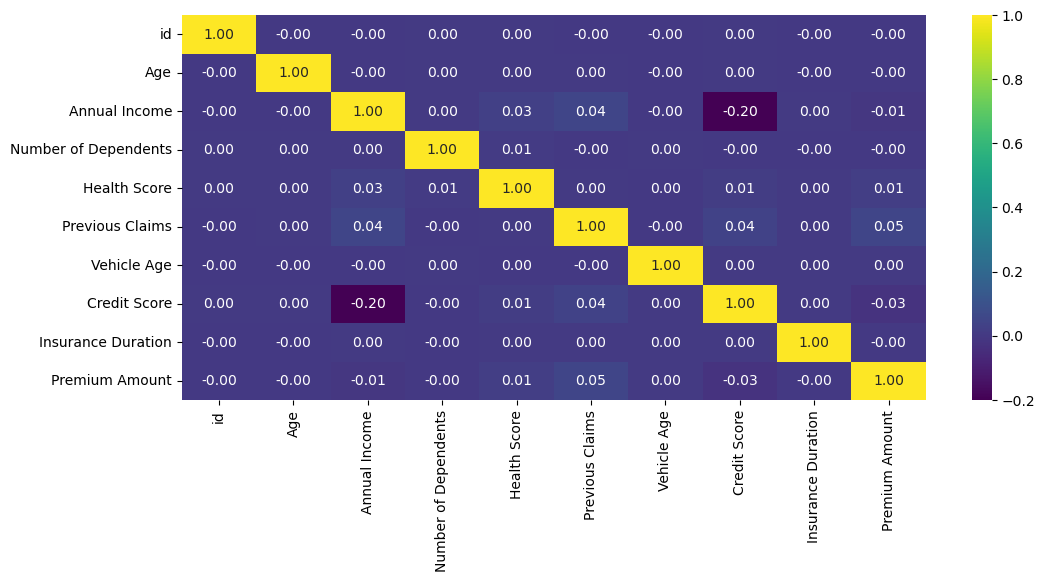

In [ ]:
# Finding the correlation among columns using heatmap
data_cor = tr_data.corr(numeric_only=True)
plt.figure(figsize=(12, 5))
sns.heatmap(data_cor, cmap= 'viridis', fmt= '.2f', annot = True)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'id'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Annual Income'),
  Text(3, 0, 'Number of Dependents'),
  Text(4, 0, 'Health Score'),
  Text(5, 0, 'Previous Claims'),
  Text(6, 0, 'Vehicle Age'),
  Text(7, 0, 'Credit Score'),
  Text(8, 0, 'Insurance Duration'),
  Text(9, 0, 'Premium Amount')])

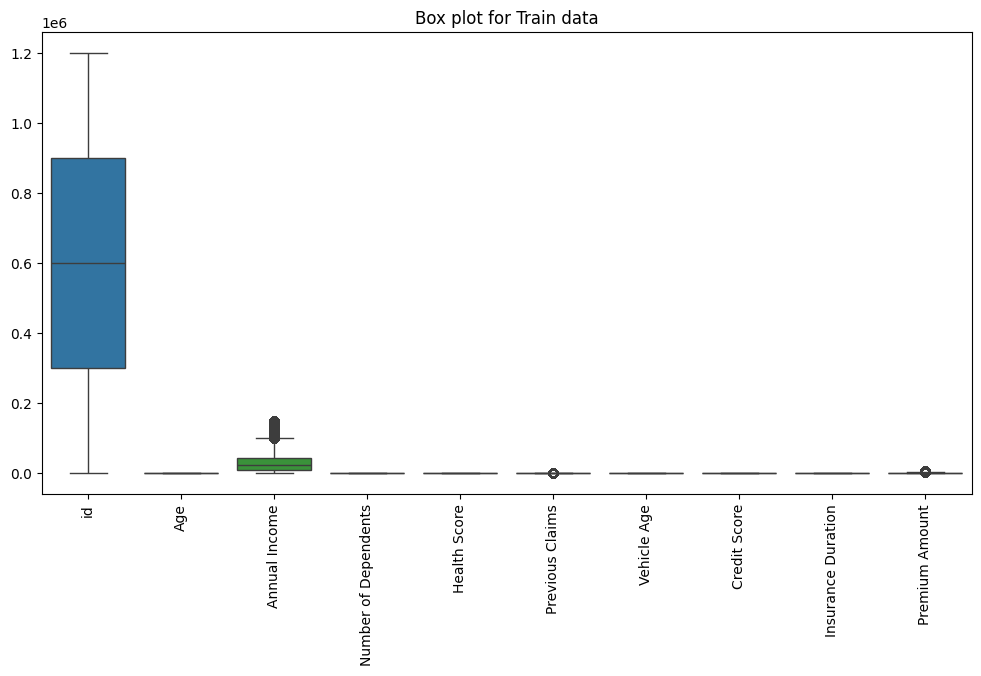

In [ ]:
#Finding Outliers using Boxplot
plt.figure(figsize=(12, 6))
plt.title("Box plot for Train data")
sns.boxplot(tr_data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'id'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Annual Income'),
  Text(3, 0, 'Number of Dependents'),
  Text(4, 0, 'Health Score'),
  Text(5, 0, 'Previous Claims'),
  Text(6, 0, 'Vehicle Age'),
  Text(7, 0, 'Credit Score'),
  Text(8, 0, 'Insurance Duration')])

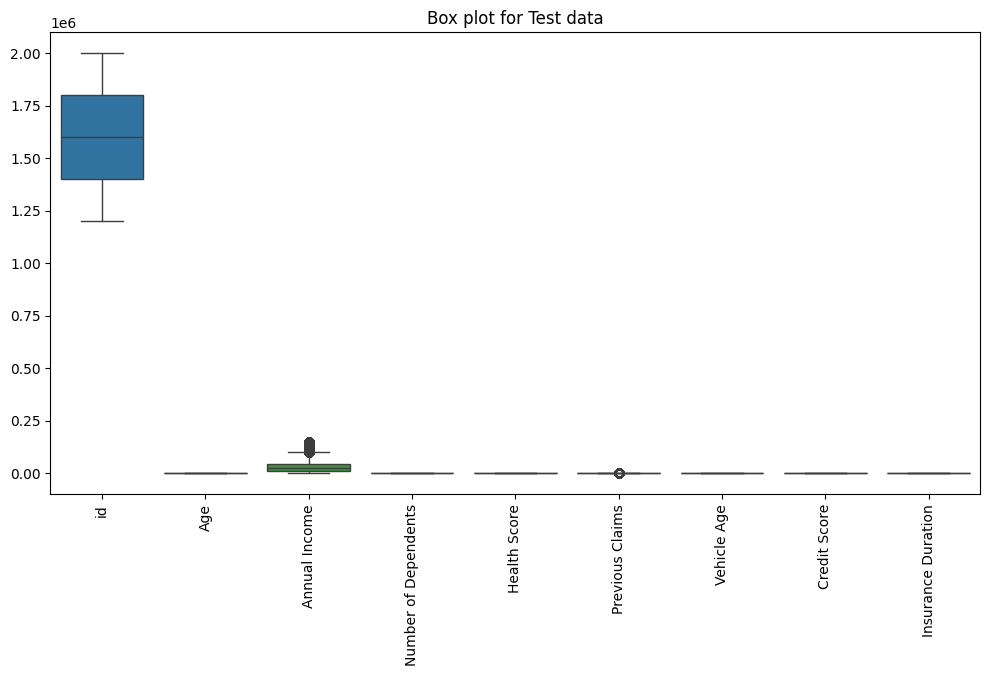

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Box plot for Test data")
sns.boxplot(ts_data)
plt.xticks(rotation=90)

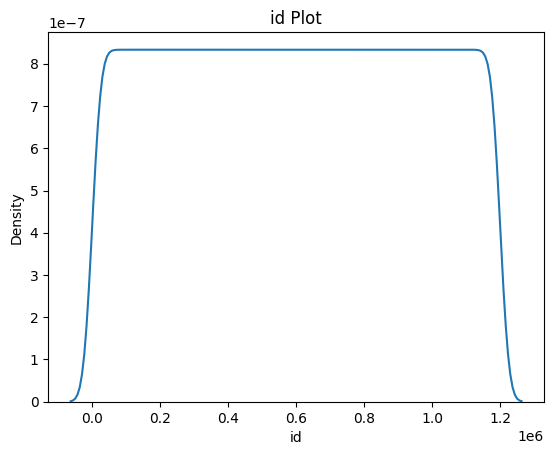

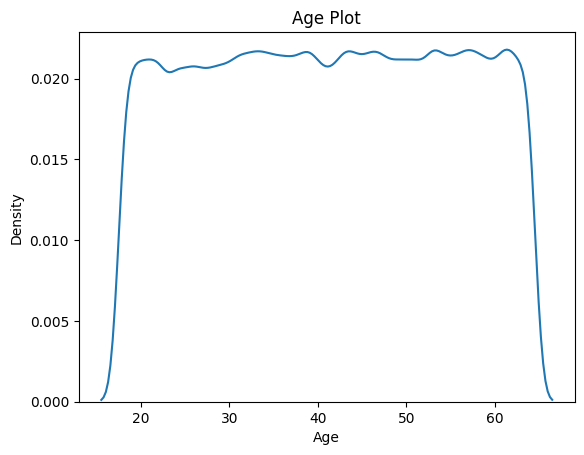

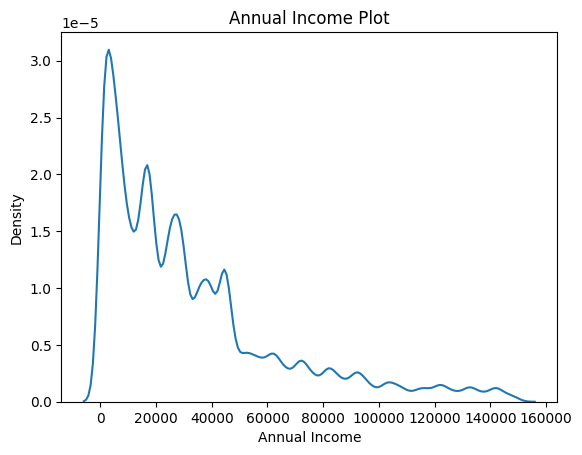

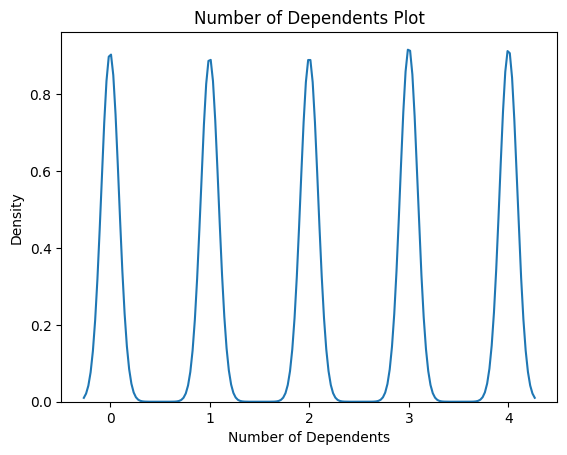

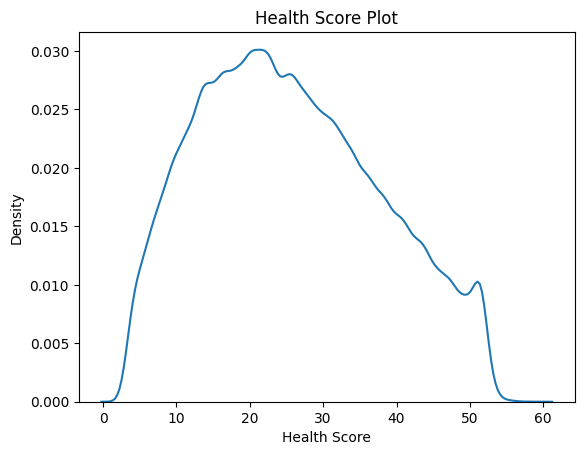

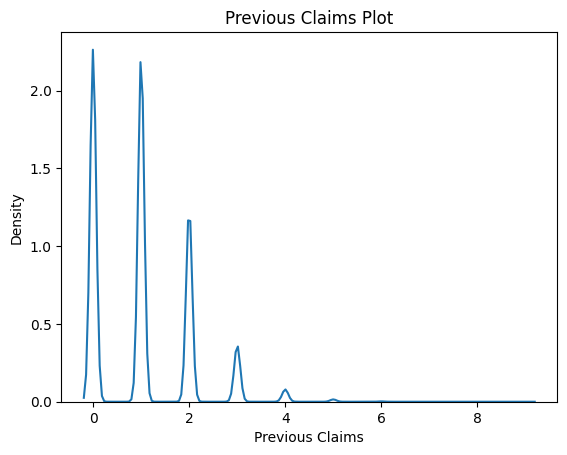

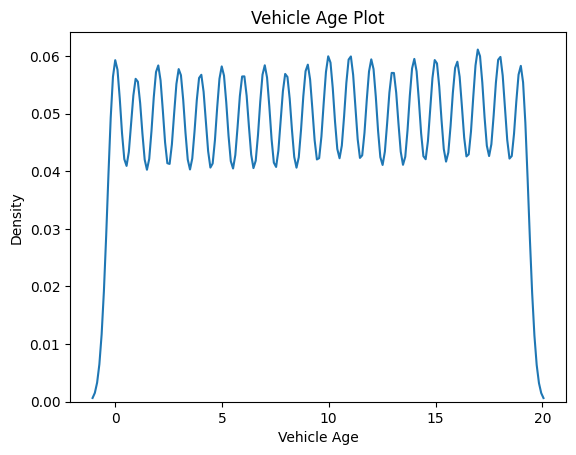

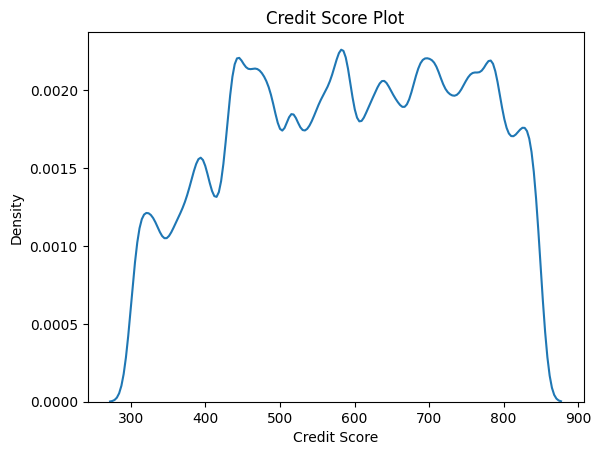

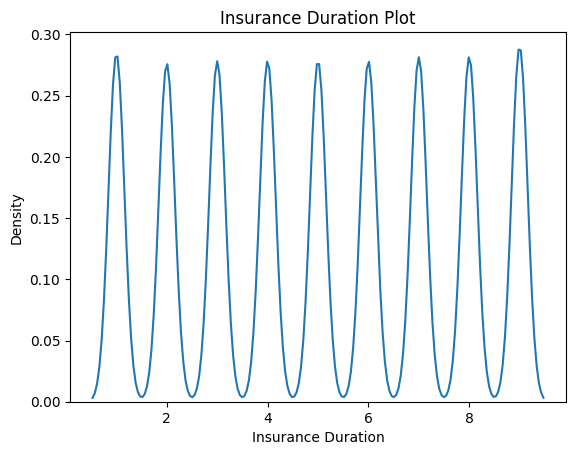

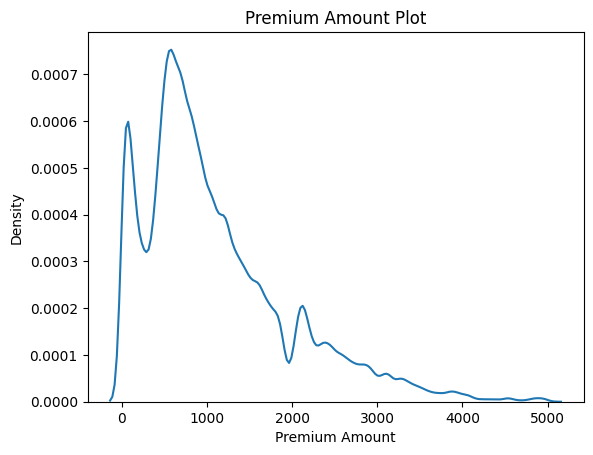

In [ ]:
# Kdeplots for all columns
obj_col = tr_data.select_dtypes(exclude='object')
for i in obj_col.columns:

    sns.kdeplot(tr_data[i])
    plt.title(i + " Plot")
    plt.show()

In [ ]:
tr_data.groupby(['Policy Type'])['Premium Amount'].mean()

,Premium Amount
Policy Type,
Basic,1103.452466
Comprehensive,1102.610526
Premium,1101.579277


In [ ]:
tr_data.groupby(['Age'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Age,,
18.0,32656.652181,1112.657710
19.0,33182.606780,1096.606915
20.0,32755.149813,1107.376372
21.0,32359.417923,1091.829191
22.0,32760.404354,1100.814019
23.0,32160.633417,1110.448353
24.0,32595.704852,1103.818145
25.0,32988.562109,1099.257256
26.0,32798.777135,1104.507035


In [ ]:
tr_data.groupby(['Gender'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Gender,,
Female,9.780242,1102.404974
Male,9.777785,1102.683476


In [ ]:
tr_data.groupby(['Occupation'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Occupation,,
Employed,32747.057259,1107.400895
Self-Employed,32909.187329,1106.609284
Unemployed,32864.541820,1105.369023


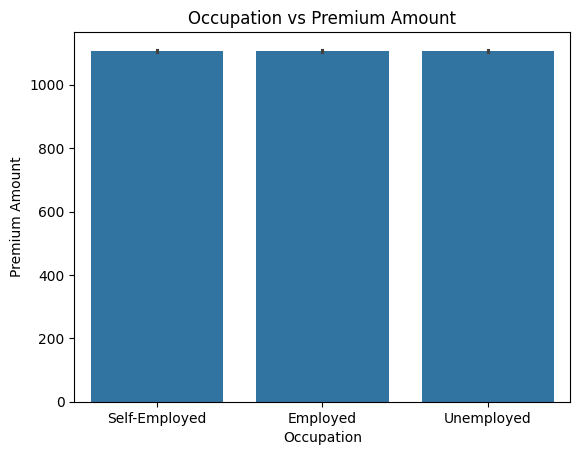

In [ ]:
#Line plots for Occupation vs Premium Amount
plt.title("Occupation vs Premium Amount")
sns.barplot(data=tr_data,x=tr_data['Occupation'],y=tr_data['Premium Amount'])
plt.show()

In [ ]:
tr_data.groupby(['Credit Score'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Credit Score,,
300.0,49079.538660,1148.592290
301.0,46042.743954,1214.760000
302.0,49446.320807,1114.382477
303.0,50828.213389,1156.864279
304.0,47494.909794,1154.892985
...,...,...
845.0,27780.207086,1115.526032
846.0,27081.889567,1135.568095
847.0,28834.402207,1131.595098


In [ ]:
tr_data['Credit Score'].value_counts()

,count
Credit Score,
434.0,4288
431.0,4277
757.0,4021
713.0,3977
437.0,3887
...,...
660.0,472
560.0,444
610.0,404


In [ ]:
tr_data.groupby(['Marital Status'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Marital Status,,
Divorced,32650.172793,1100.625116
Married,32590.641923,1099.844389
Single,32646.000668,1101.735535


In [ ]:
tr_data.groupby(['Number of Dependents'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Number of Dependents,,
0.0,32589.296488,1097.665296
1.0,32634.795222,1102.580827
2.0,32626.179159,1104.236089
3.0,32687.477370,1100.703362
4.0,32804.713335,1095.644027


<Axes: xlabel='Number of Dependents'>

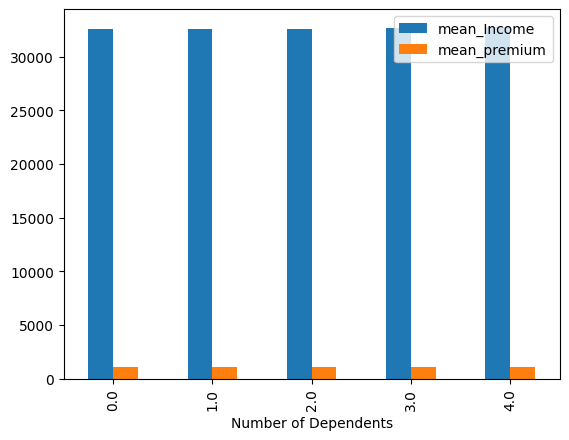

In [ ]:
tr_data.groupby(['Number of Dependents'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
).plot(kind='bar')

In [ ]:
tr_data.groupby(['Education Level'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Education Level,,
Bachelor's,32643.411033,1102.698438
High School,32884.980592,1104.787490
Master's,32744.225348,1102.113989
PhD,32714.714481,1100.683885


In [ ]:
tr_data.groupby(['Health Score'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Health Score,,
2.012237,57445.0,2066.0
2.024415,52384.0,1454.0
2.039338,1415.0,686.0
2.053458,126796.0,1245.0
2.056559,80188.0,1174.0
...,...,...
58.401009,108606.0,958.0
58.452478,55860.0,2805.0
58.569689,18447.0,2850.0


In [ ]:
tr_data.groupby(['Location'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Location,,
Rural,32713.422005,1101.467665
Suburban,32769.391220,1102.462014
Urban,32752.895248,1103.714936


<Axes: xlabel='Location'>

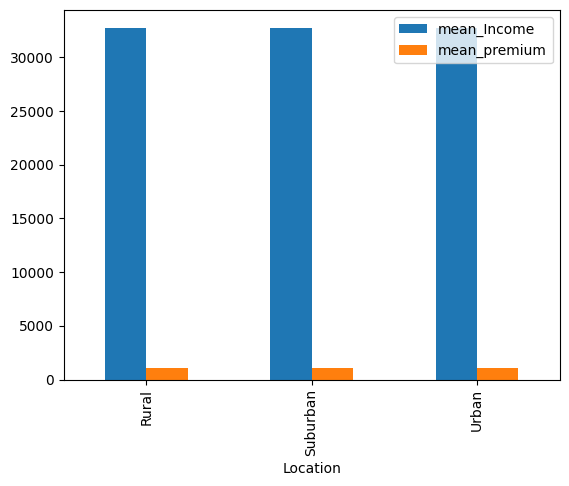

In [ ]:
tr_data.groupby(['Location'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
).plot(kind='bar')

In [ ]:
tr_data.groupby(['Previous Claims'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
)

,mean_Income,mean_premium
Previous Claims,,
0.0,32219.027203,1083.014746
1.0,32102.203545,1092.002517
2.0,34590.008235,1172.248078
3.0,37455.465966,1202.657077
4.0,38149.097354,1242.399231
5.0,38168.035751,1239.520317
6.0,39917.169550,1334.129139
7.0,39601.618182,1483.241379
8.0,38050.750000,1298.000000


<Axes: xlabel='Previous Claims'>

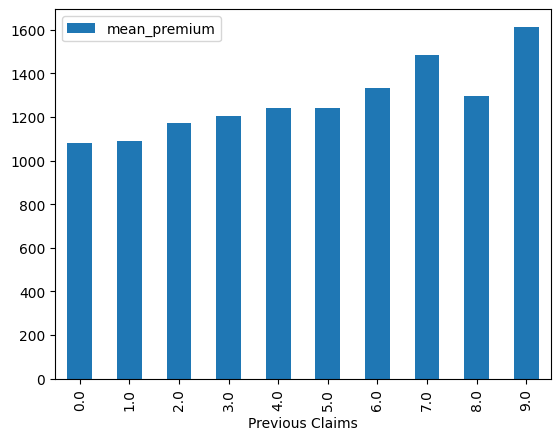

In [ ]:
tr_data.groupby(['Previous Claims'])['Premium Amount'].agg(
    mean_premium='mean'
).plot(kind='bar')

In [ ]:
df=tr_data.groupby(['Exercise Frequency','Smoking Status'])['Premium Amount'].agg(
    mean_premium='mean'
).reset_index()
df

,Exercise Frequency,Smoking Status,mean_premium
0,Daily,No,1102.456119
1,Daily,Yes,1105.121009
2,Monthly,No,1103.980345
3,Monthly,Yes,1102.048739
4,Rarely,No,1101.832100
5,Rarely,Yes,1102.550694
6,Weekly,No,1101.365569
7,Weekly,Yes,1101.103920


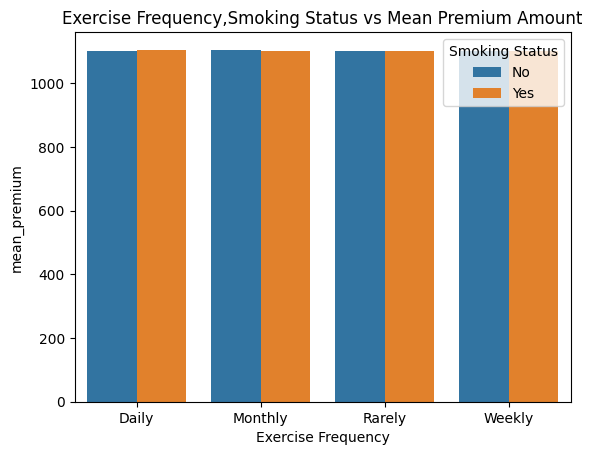

In [ ]:
#Line plots for Age vs Premium Amount
plt.title("Exercise Frequency,Smoking Status vs Mean Premium Amount")
sns.barplot(data=df,x=df['Exercise Frequency'],y=df['mean_premium'],hue=df['Smoking Status'])
plt.show()

In [ ]:
tr_data.groupby(['Insurance Duration'])['Premium Amount'].agg(
    mean_premium='mean'
)

,mean_premium
Insurance Duration,
1.0,1097.042977
2.0,1106.883166
3.0,1101.733536
4.0,1104.723079
5.0,1100.812035
6.0,1104.558441
7.0,1105.964863
8.0,1105.876809
9.0,1095.676958


In [ ]:
tr_data.groupby(['Vehicle Age'])['Premium Amount'].agg(
    mean_premium='mean'
)

,mean_premium
Vehicle Age,
0.0,1099.711888
1.0,1102.784102
2.0,1107.373964
3.0,1102.005063
4.0,1106.514463
5.0,1100.402898
6.0,1105.904673
7.0,1103.708911
8.0,1101.661309


In [ ]:
df = tr_data.groupby(['Property Type','Location'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income', 'mean'),
    mean_premium=('Premium Amount', 'mean')
).reset_index()
df

,Property Type,Location,mean_Income,mean_premium
0,Apartment,Rural,32681.443586,1103.644838
1,Apartment,Suburban,32835.289149,1102.768390
2,Apartment,Urban,32709.825524,1106.058002
3,Condo,Rural,32787.795842,1100.630334
4,Condo,Suburban,32757.815283,1101.204874
5,Condo,Urban,32819.924610,1103.953361
6,House,Rural,32670.953007,1100.135063
7,House,Suburban,32714.924231,1103.409299
8,House,Urban,32729.024953,1101.136032


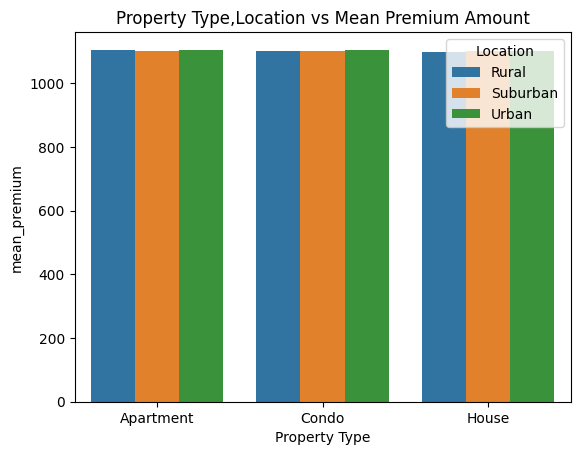

In [ ]:
plt.title("Property Type,Location vs Mean Premium Amount")
sns.barplot(data=df,x=df['Property Type'],y=df['mean_premium'],hue=df['Location'])
plt.show()

In [ ]:
tr_data['Age'].fillna(tr_data['Age'].median(),inplace=True)

In [ ]:
#Histplot for Age vs Premium Amount
df = tr_data
df['Age Group'] = pd.cut(df['Age'], bins=[10,20, 30, 40, 50, 60,70], labels=['10-20','20-30', '30-40', '40-50', '50-60','60-70'])
df['Age Group'].value_counts()

,count
Age Group,
40-50,270506
30-40,254369
50-60,253341
20-30,245260
60-70,102340
10-20,74184


In [ ]:
df.groupby(['Age Group'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income','mean'),
    mean_premium=('Premium Amount','mean')
)

,mean_Income,mean_premium
Age Group,,
10-20,32864.685429,1105.542543
20-30,32629.952818,1105.494434
30-40,32798.263947,1103.540380
40-50,32791.701924,1102.516602
50-60,32735.996471,1099.217257
60-70,32703.091875,1099.140463


<Axes: title={'center': 'Age Group vs Mean Premium Amount'}, xlabel='Age Group', ylabel='Count'>

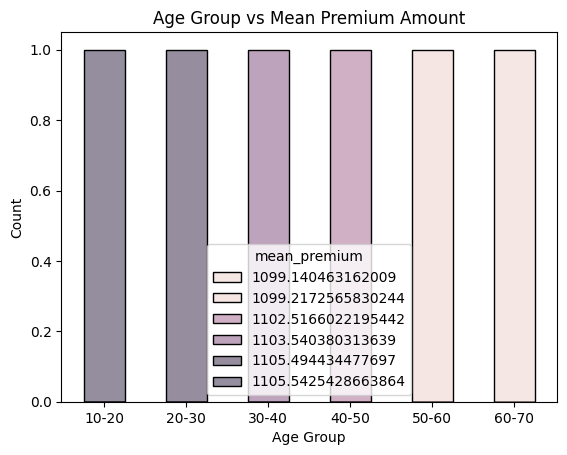

In [ ]:
plt.title("Age Group vs Mean Premium Amount")
sns.histplot(x='Age Group',hue='mean_premium',
             data=df.groupby(['Age Group'])['Premium Amount'].agg(mean_premium='mean'),shrink =0.5)

In [ ]:
#Histplot for Credit Score vs Premium Amount
df = tr_data
df['Credit Group'] = pd.cut(df['Credit Score'], bins=[300,400,500,600,700,800,900], labels=['300-400','400-500', '500-600', '600-700', '700-800','800-900'])
df['Credit Group'].value_counts()

,count
Credit Group,
700-800,221342
600-700,210527
500-600,205074
400-500,199459
300-400,134408
800-900,90452


In [ ]:
df.groupby(['Credit Group'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income','mean'),
    mean_premium=('Premium Amount','mean')
)

,mean_Income,mean_premium
Credit Group,,
300-400,49453.383267,1148.134836
400-500,41043.171677,1150.492507
500-600,28782.576246,1088.359524
600-700,28242.386456,1075.110342
700-800,28331.448425,1074.977347
800-900,28826.528316,1117.913291


<Axes: title={'center': 'Credit Score Group vs Mean Premium Amount'}, xlabel='Credit Group', ylabel='Count'>

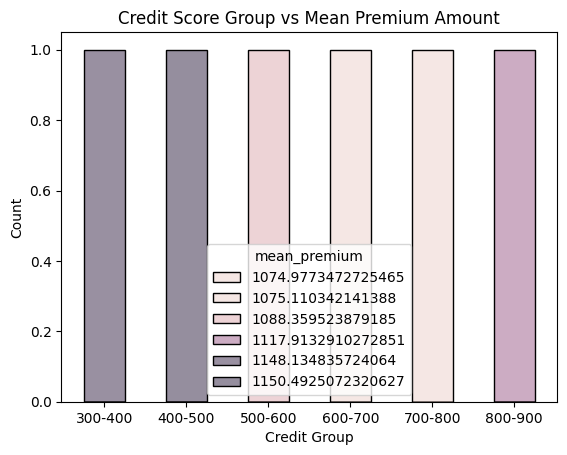

In [ ]:
plt.title("Credit Score Group vs Mean Premium Amount")
sns.histplot(x='Credit Group',hue='mean_premium',
             data=df.groupby(['Credit Group'])['Premium Amount'].agg(mean_premium='mean'),shrink =0.5)

In [ ]:
#Histplot for Health Score vs Premium Amount
df = tr_data
df['Health Group'] = pd.cut(df['Health Score'], bins=[0,10,20,30,40,50,60], labels=['0-10','10-20', '20-30', '30-40', '40-50','50-60'])
df['Health Group'].value_counts()

,count
Health Group,
20-30,313474
10-20,300741
30-40,229504
40-50,136626
0-10,115395
50-60,30184


In [ ]:
df.groupby(['Health Group'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income','mean'),
    mean_premium=('Premium Amount','mean')
)

,mean_Income,mean_premium
Health Group,,
0-10,32653.384057,1109.197409
10-20,32397.581103,1086.017796
20-30,32175.654738,1080.001614
30-40,32289.986020,1108.012222
40-50,33050.741821,1132.188946
50-60,45992.739955,1163.946362


<Axes: title={'center': 'Health Score Group vs Mean Premium Amount'}, xlabel='Health Group', ylabel='Count'>

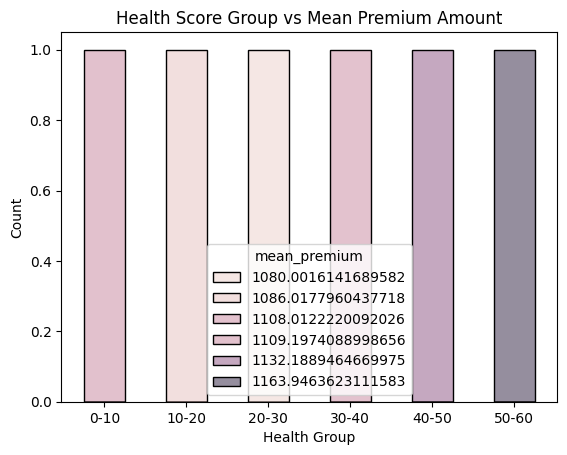

In [ ]:
plt.title("Health Score Group vs Mean Premium Amount")
sns.histplot(x='Health Group',hue='mean_premium',
             data=df.groupby(['Health Group'])['Premium Amount'].agg(mean_premium='mean'),shrink =0.5)

In [ ]:
tr_data.groupby(['Insurance Duration'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income','mean'),
    mean_premium=('Premium Amount','mean')
)

,mean_Income,mean_premium
Insurance Duration,,
1.0,32677.814151,1097.042977
2.0,32614.687464,1106.883166
3.0,32808.470710,1101.733536
4.0,32860.957136,1104.723079
5.0,32763.191735,1100.812035
6.0,32841.295312,1104.558441
7.0,32642.735126,1105.964863
8.0,32803.177244,1105.876809
9.0,32697.465106,1095.676958


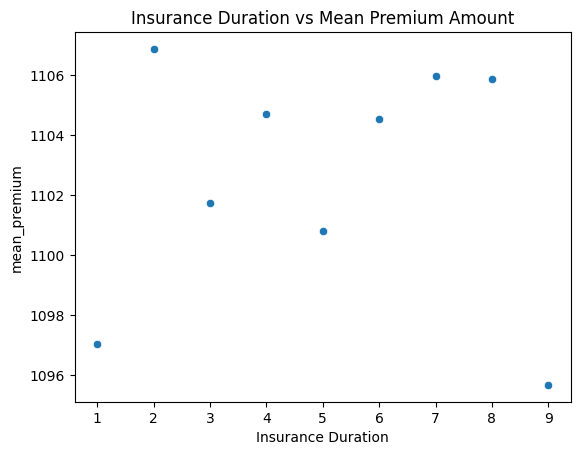

In [ ]:
#Line plots for Insurance Duration vs Premium Amount
plt.title("Insurance Duration vs Mean Premium Amount")
sns.scatterplot(data=tr_data.groupby(['Insurance Duration'])['Premium Amount'].agg(mean_premium='mean').reset_index(),
             x='Insurance Duration',y='mean_premium')
plt.show()

In [ ]:
tr_data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [ ]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
tr_data['Policy Start Date'].value_counts()

,count
Policy Start Date,
2020-02-08 15:21:39.134960,142
2023-08-13 15:21:39.155231,137
2022-02-02 15:21:39.134960,137
2022-08-30 15:21:39.134960,134
2023-11-02 15:21:39.134960,118
...,...
2022-11-09 15:21:39.101733,1
2019-09-09 15:21:39.101733,1
2020-06-06 15:21:39.278180,1


In [ ]:
df = tr_data
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy Start Year'] = df['Policy Start Date'].dt.year

In [ ]:
df[['Policy Start Date','Policy Start Year']]

,Policy Start Date,Policy Start Year
0,2023-12-23 15:21:39.134960,2023
1,2023-06-12 15:21:39.111551,2023
2,2023-09-30 15:21:39.221386,2023
3,2024-06-12 15:21:39.226954,2024
4,2021-12-01 15:21:39.252145,2021
...,...,...
1199995,2023-05-03 15:21:39.257696,2023
1199996,2022-09-10 15:21:39.134960,2022
1199997,2021-05-25 15:21:39.106582,2021
1199998,2021-09-19 15:21:39.190215,2021


In [ ]:
df.groupby(['Policy Type','Policy Start Year'])[['Annual Income','Premium Amount']].agg(
    mean_Income=('Annual Income','mean'),
    mean_premium=('Premium Amount','mean')
)

mean_Income  mean_premium
Policy Type   Policy Start Year                            
Basic         2019               36579.589633   1183.307008
              2020               32416.782843   1098.811890
              2021               32416.060424   1093.263952
              2022               32360.738136   1091.807600
              2023               32555.935607   1096.819830
              2024               33027.943533   1112.170794
Comprehensive 2019               36038.794416   1187.652367
              2020               32456.227931   1093.369618
              2021               32280.304428   1094.199326
              2022               32364.892030   1098.710925
              2023               32376.070466   1095.347419
              2024               32954.432442   1101.584716
Premium       2019               36168.776941   1197.808428
              2020               32174.430764   1097.777430
              2021               32412.012360   1092.574412
              2022               32385.202091   1084.728089
              2023               32476.903958   1091.514210
              2024               33304.014931   1112.829859

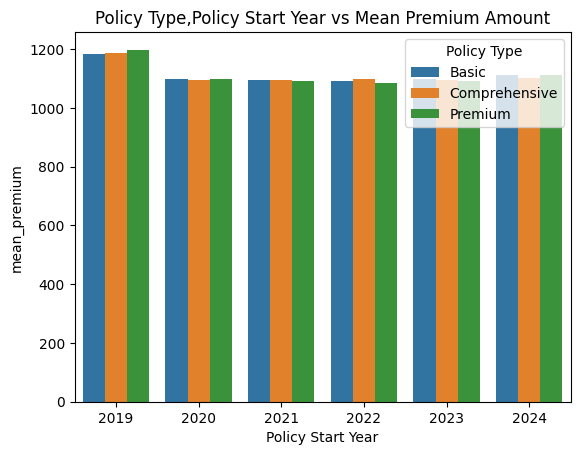

In [ ]:
plt.title("Policy Type,Policy Start Year vs Mean Premium Amount")
sns.barplot(data=df.groupby(['Policy Type','Policy Start Year'])['Premium Amount'].agg(mean_premium='mean').reset_index(),
             x='Policy Start Year',y='mean_premium',hue='Policy Type')
plt.show()

In [ ]:
tr_data['Customer Feedback'].value_counts()

,count
Customer Feedback,
Average,377905
Poor,375518
Good,368753


In [ ]:
print(tr_data['Previous Claims'].value_counts())

Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64


In [ ]:
tr_data.drop(["Policy Start Date","id"],axis=1,inplace=True)
obj_col = list(tr_data.select_dtypes(include='object').columns)

In [ ]:
num_col = list(tr_data.select_dtypes(exclude='object').columns)

In [ ]:
obj_col

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [ ]:
num_col

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

In [ ]:
num_col.pop(4)

'Previous Claims'

In [ ]:
obj_col.append('Previous Claims')

In [ ]:
obj_col

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type',
 'Previous Claims']

In [ ]:
num_col

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

# **Preprocess**

In [5]:
tr_data = pd.read_csv("/content/drive/MyDrive/Project3_Smart_Premium/train.csv")
ts_data = pd.read_csv("/content/drive/MyDrive/Project3_Smart_Premium/test.csv")
tar_var = pd.read_csv("/content/drive/MyDrive/Project3_Smart_Premium/sample_submission.csv")

In [ ]:
tr_data.dtypes

,0
id,int64
Age,float64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,float64
Education Level,object
Occupation,object
Health Score,float64
Location,object


In [6]:
class DataCleaning:

    def reg_performance(self,act, pred):
        mse = mean_squared_error(act, pred)
        rmse = root_mean_squared_error(act, pred)
        r2score = r2_score(act,pred)
        mae = mean_absolute_error(act,pred)
        rmsle = root_mean_squared_log_error(act,pred)

        return pd.DataFrame({
            'rmsle': [rmsle],
            'rmse':[rmse],
            "r2_score":[r2score],
            "mae" :[mae],
            "mse" : [mse]
            })

    #Fill the null values in the columns.Columns with Numerical values uses median values and columns with
    #Categorical values uses mode values to fill null values.
    def Fillnull(self,df):
        df["Age"].fillna(df["Age"].median(),inplace=True)
        df["Annual Income"].fillna(df["Annual Income"].median(),inplace=True)
        df["Marital Status"].fillna(df["Marital Status"].mode()[0],inplace=True)
        df["Number of Dependents"].fillna(df["Number of Dependents"].median(),inplace=True)
        df["Occupation"].fillna(df["Occupation"].mode()[0],inplace=True)
        df["Health Score"].fillna(df["Health Score"].median(),inplace=True)
        df["Previous Claims"].fillna(df["Previous Claims"].median(),inplace=True)
        df["Vehicle Age"].fillna(df["Vehicle Age"].median(),inplace=True)
        df["Insurance Duration"].fillna(df["Insurance Duration"].median(),inplace=True)
        df["Credit Score"].fillna(df["Credit Score"].median(),inplace=True)
        df["Customer Feedback"].fillna(df["Customer Feedback"].mode()[0],inplace=True)
        return df

    def MapTransform(self,df):
        # Taking Log transform of Annual income
        df['Annual Income']=np.log(df['Annual Income'])

        # Drop policy start date and id columns
        df.drop(["Policy Start Date","id"],axis=1,inplace=True)

        return df

In [7]:
dc = DataCleaning()
tr_data = dc.Fillnull(tr_data)
ts_data = dc.Fillnull(ts_data)

In [ ]:
tr_data.isnull().sum()

,0
id,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0


In [8]:
convert_dict = {'Age': int, 'Number of Dependents': int, 'Previous Claims': int, 'Vehicle Age':int,
                'Insurance Duration': int,'Credit Score': int}
tr_data = tr_data.astype(convert_dict)
tr_data.dtypes

,0
id,int64
Age,int64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,int64
Education Level,object
Occupation,object
Health Score,float64
Location,object


In [ ]:
tr_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19,Female,10049.0,Married,1,Bachelor's,Self-Employed,22.598761,Urban,...,2,17,372,5,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39,Female,31678.0,Divorced,3,Master's,Employed,15.569731,Rural,...,1,12,694,2,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23,Male,25602.0,Divorced,3,High School,Self-Employed,47.177549,Suburban,...,1,14,595,3,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21,Male,141855.0,Married,2,Bachelor's,Employed,10.938144,Rural,...,1,0,367,1,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21,Male,39651.0,Single,1,Bachelor's,Self-Employed,20.376094,Rural,...,0,8,598,4,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36,Female,27316.0,Married,0,Master's,Unemployed,13.772907,Urban,...,1,5,372,3,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54,Male,35786.0,Divorced,2,Master's,Self-Employed,11.483482,Rural,...,1,10,597,4,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19,Male,51884.0,Divorced,0,Master's,Employed,14.724469,Suburban,...,0,19,595,6,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55,Male,23911.0,Single,1,PhD,Employed,18.547381,Suburban,...,1,7,407,4,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [9]:
tr_data = dc.MapTransform(tr_data)
ts_data = dc.MapTransform(ts_data)

In [ ]:
ts_data.isnull().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [10]:
tr_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19,Female,9.215228,Married,1,Bachelor's,Self-Employed,22.598761,Urban,Premium,2,17,372,5,Poor,No,Weekly,House,2869.0
1,39,Female,10.363378,Divorced,3,Master's,Employed,15.569731,Rural,Comprehensive,1,12,694,2,Average,Yes,Monthly,House,1483.0
2,23,Male,10.150426,Divorced,3,High School,Self-Employed,47.177549,Suburban,Premium,1,14,595,3,Good,Yes,Weekly,House,567.0
3,21,Male,11.862561,Married,2,Bachelor's,Employed,10.938144,Rural,Basic,1,0,367,1,Poor,Yes,Daily,Apartment,765.0
4,21,Male,10.587871,Single,1,Bachelor's,Self-Employed,20.376094,Rural,Premium,0,8,598,4,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36,Female,10.215228,Married,0,Master's,Unemployed,13.772907,Urban,Premium,1,5,372,3,Poor,No,Daily,Apartment,1303.0
1199996,54,Male,10.485312,Divorced,2,Master's,Self-Employed,11.483482,Rural,Comprehensive,1,10,597,4,Poor,No,Weekly,Apartment,821.0
1199997,19,Male,10.856766,Divorced,0,Master's,Employed,14.724469,Suburban,Basic,0,19,595,6,Good,No,Monthly,Condo,371.0
1199998,55,Male,10.082094,Single,1,PhD,Employed,18.547381,Suburban,Premium,1,7,407,4,Poor,No,Daily,Apartment,596.0


In [ ]:
ts_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,28.0,Female,7.745003,Single,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.0,19.0,595.0,1.0,Poor,Yes,Weekly,House
1,31.0,Female,11.744283,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.0,14.0,372.0,8.0,Good,Yes,Rarely,Apartment
2,47.0,Female,9.746366,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.0,16.0,819.0,9.0,Average,Yes,Monthly,Condo
3,28.0,Female,10.322987,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Poor,Yes,Daily,House
4,24.0,Male,9.293118,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.0,14.0,755.0,7.0,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,Female,10.565712,Married,1.0,Bachelor's,Employed,14.498639,Rural,Premium,1.0,8.0,309.0,2.0,Average,Yes,Daily,Condo
799996,41.0,Female,11.204524,Single,0.0,Master's,Employed,8.145748,Rural,Basic,2.0,0.0,595.0,2.0,Good,No,Daily,Apartment
799997,26.0,Female,10.468176,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,1.0,10.0,595.0,6.0,Poor,No,Monthly,Apartment
799998,34.0,Female,10.729000,Single,3.0,Master's,Employed,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,Average,No,Weekly,Condo


<Axes: ylabel='Annual Income'>

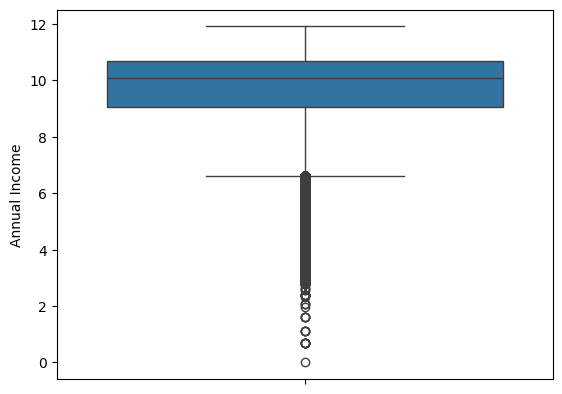

In [ ]:
sns.boxplot(tr_data['Annual Income'])

<Axes: xlabel='Annual Income', ylabel='Density'>

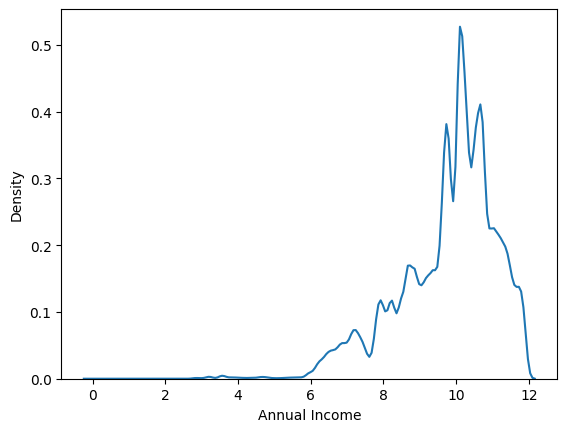

In [ ]:
sns.kdeplot(tr_data['Annual Income'])

In [10]:
# Finding outliers
def get_outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers

In [11]:
get_outliers(tr_data,'Annual Income')

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
51,59,Male,6.259581,Divorced,1,PhD,Employed,24.578648,Urban,Premium,1,9,439,9,Average,Yes,Weekly,Apartment,537.0
83,41,Male,6.469250,Single,3,PhD,Employed,30.766284,Urban,Comprehensive,1,18,319,4,Good,No,Weekly,House,934.0
118,39,Female,6.473891,Single,3,Bachelor's,Employed,24.578648,Rural,Comprehensive,1,14,758,4,Good,No,Weekly,Apartment,1405.0
130,35,Male,5.899897,Single,0,Master's,Unemployed,29.957311,Rural,Comprehensive,0,17,388,9,Poor,Yes,Monthly,Condo,747.0
145,26,Female,6.390241,Married,1,High School,Employed,10.836942,Urban,Basic,1,7,607,1,Average,Yes,Rarely,House,656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199854,18,Female,3.871201,Married,2,High School,Employed,15.917234,Rural,Premium,0,2,381,3,Good,No,Daily,Condo,893.0
1199855,26,Female,5.774552,Married,0,Master's,Self-Employed,34.547223,Rural,Basic,1,17,794,9,Poor,Yes,Weekly,House,23.0
1199859,46,Male,3.806662,Married,3,High School,Employed,25.734961,Rural,Premium,0,4,734,6,Average,No,Weekly,Apartment,572.0
1199939,33,Male,6.304449,Single,3,Bachelor's,Unemployed,35.704076,Urban,Comprehensive,2,9,762,1,Poor,No,Weekly,Apartment,1581.0


In [ ]:
30174/tr_data.shape[0]

0.025145

In [ ]:
tr_data.drop(get_outliers(tr_data,'Annual Income').index,axis=0,inplace=True)

In [14]:
tr_data.shape

(1200000, 19)

<Axes: ylabel='Annual Income'>

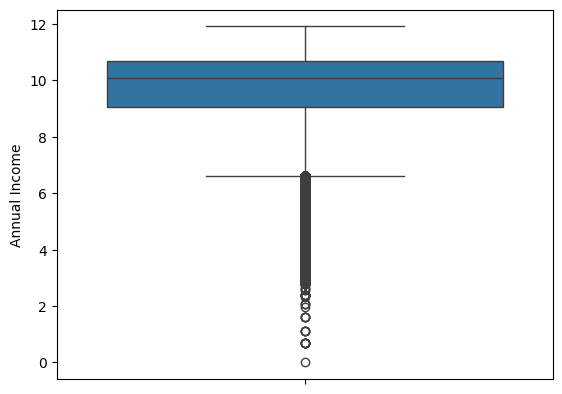

In [15]:
sns.boxplot(tr_data['Annual Income'])

<Axes: xlabel='Annual Income', ylabel='Density'>

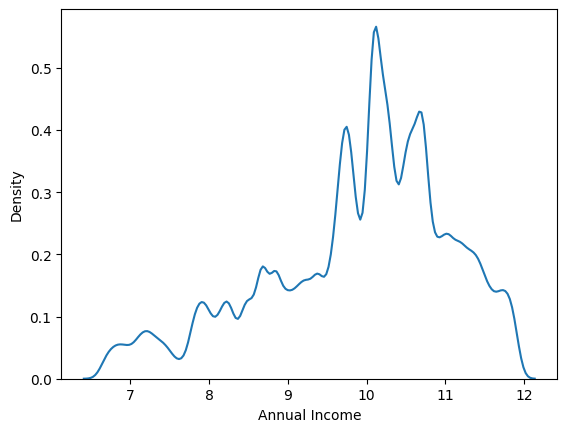

In [ ]:
sns.kdeplot(tr_data['Annual Income'])

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Annual Income'),
  Text(2, 0, 'Number of Dependents'),
  Text(3, 0, 'Health Score'),
  Text(4, 0, 'Previous Claims'),
  Text(5, 0, 'Vehicle Age'),
  Text(6, 0, 'Credit Score'),
  Text(7, 0, 'Insurance Duration'),
  Text(8, 0, 'Premium Amount')])

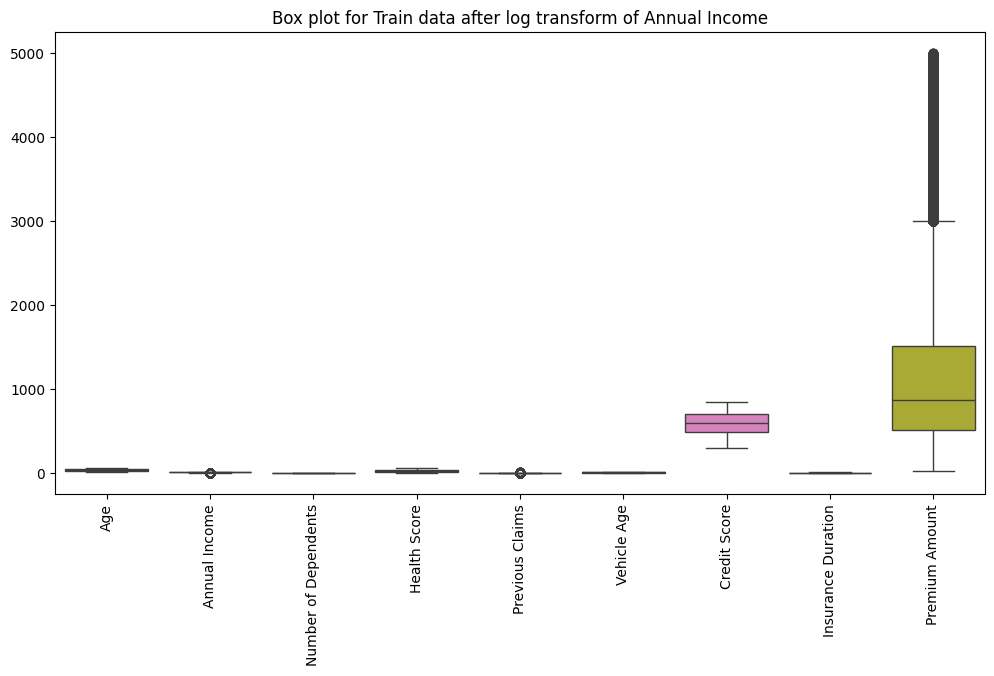

In [17]:
plt.figure(figsize=(12, 6))
plt.title("Box plot for Train data after log transform of Annual Income")
sns.boxplot(tr_data)
plt.xticks(rotation=90)

<Axes: xlabel='Annual Income', ylabel='Density'>

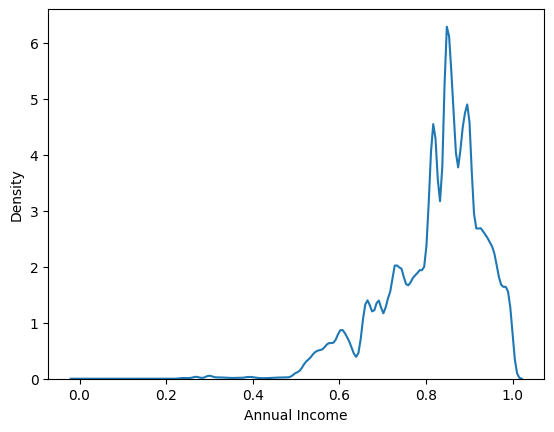

In [ ]:
sns.kdeplot(tr_data['Annual Income'])

In [18]:
cat_col = tr_data.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [11]:
num_col = tr_data.select_dtypes(exclude='object').columns.to_list()
num_col.remove('Premium Amount')
# num_col.remove('Annual Income')
num_col

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

In [ ]:
tr_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19,Female,9.215228,Married,1,Bachelor's,Self-Employed,22.598761,Urban,Premium,2,17,372,5,Poor,No,Weekly,House,2869.0
1,39,Female,10.363378,Divorced,3,Master's,Employed,15.569731,Rural,Comprehensive,1,12,694,2,Average,Yes,Monthly,House,1483.0
2,23,Male,10.150426,Divorced,3,High School,Self-Employed,47.177549,Suburban,Premium,1,14,595,3,Good,Yes,Weekly,House,567.0
3,21,Male,11.862561,Married,2,Bachelor's,Employed,10.938144,Rural,Basic,1,0,367,1,Poor,Yes,Daily,Apartment,765.0
4,21,Male,10.587871,Single,1,Bachelor's,Self-Employed,20.376094,Rural,Premium,0,8,598,4,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36,Female,10.215228,Married,0,Master's,Unemployed,13.772907,Urban,Premium,1,5,372,3,Poor,No,Daily,Apartment,1303.0
1199996,54,Male,10.485312,Divorced,2,Master's,Self-Employed,11.483482,Rural,Comprehensive,1,10,597,4,Poor,No,Weekly,Apartment,821.0
1199997,19,Male,10.856766,Divorced,0,Master's,Employed,14.724469,Suburban,Basic,0,19,595,6,Good,No,Monthly,Condo,371.0
1199998,55,Male,10.082094,Single,1,PhD,Employed,18.547381,Suburban,Premium,1,7,407,4,Poor,No,Daily,Apartment,596.0


In [ ]:
tr_data['Policy Type'].value_counts()

,count
Policy Type,
0.0,401846
1.0,399600
2.0,398554


In [12]:
col_one_hot = ['Marital Status','Property Type']
col_ordinal = ['Education Level','Exercise Frequency','Customer Feedback','Gender',
               'Occupation','Location','Policy Type','Smoking Status']
col_map = [['High School', "Bachelor's", "Master's", "PhD"],['Rarely', "Monthly", "Weekly", "Daily"],
           ['Poor', "Average", "Good"],['Female', 'Male'],['Unemployed','Self-Employed','Employed'],
           ['Rural','Suburban','Urban'],['Premium','Comprehensive','Basic'],['No', 'Yes']
           ]

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(sparse_output=False, drop ='first'), col_one_hot),
        ("ordinal", OrdinalEncoder(categories=col_map), col_ordinal),
        ("standard", StandardScaler(), num_col)
    ])
preprocessor

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Marital Status', 'Property Type']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High School',
                                                             "Bachelor's",
                                                             "Master's",
                                                             'PhD'],
                                                            ['Rarely',
                                                             'Monthly',
                                                             'Weekly',
                                                             'Daily'],
                                                            ['Poor', 'Average',
                                                             'Good'],
                                                            ['Female', 'Male'],
                                                            ['Unemployed',
                                                             'Self-Employed',
                                                             'Employed'],
                                                            ['Rural',
                                                             'Suburban',
                                                             'Urban'],
                                                            ['Premium',
                                                             'Comprehensive',
                                                             'Basic'],
                                                            ['No', 'Yes']]),
                                 ['Education Level', 'Exercise Frequency',
                                  'Customer Feedback', 'Gender', 'Occupation',
                                  'Location', 'Policy Type',
                                  'Smoking Status']),
                                ('standard', StandardScaler(),
                                 ['Age', 'Annual Income',
                                  'Number of Dependents', 'Health Score',
                                  'Previous Claims', 'Vehicle Age',
                                  'Credit Score', 'Insurance Duration'])])

In [ ]:
preprocessor.fit_transform(tr_data)
preprocessor.transform(ts_data)

array([[0., 1., 0., ..., 0., 2., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 0., ..., 2., 1., 0.],
       [0., 1., 1., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
tr_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19,Female,9.215228,Married,1,Bachelor's,Self-Employed,22.598761,Urban,Premium,2,17,372,5,Poor,No,Weekly,House,2869.0
1,39,Female,10.363378,Divorced,3,Master's,Employed,15.569731,Rural,Comprehensive,1,12,694,2,Average,Yes,Monthly,House,1483.0
2,23,Male,10.150426,Divorced,3,High School,Self-Employed,47.177549,Suburban,Premium,1,14,595,3,Good,Yes,Weekly,House,567.0
3,21,Male,11.862561,Married,2,Bachelor's,Employed,10.938144,Rural,Basic,1,0,367,1,Poor,Yes,Daily,Apartment,765.0
4,21,Male,10.587871,Single,1,Bachelor's,Self-Employed,20.376094,Rural,Premium,0,8,598,4,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36,Female,10.215228,Married,0,Master's,Unemployed,13.772907,Urban,Premium,1,5,372,3,Poor,No,Daily,Apartment,1303.0
1199996,54,Male,10.485312,Divorced,2,Master's,Self-Employed,11.483482,Rural,Comprehensive,1,10,597,4,Poor,No,Weekly,Apartment,821.0
1199997,19,Male,10.856766,Divorced,0,Master's,Employed,14.724469,Suburban,Basic,0,19,595,6,Good,No,Monthly,Condo,371.0
1199998,55,Male,10.082094,Single,1,PhD,Employed,18.547381,Suburban,Premium,1,7,407,4,Poor,No,Daily,Apartment,596.0


# **DT Model**

In [15]:
tr_data.shape

(1200000, 19)

In [14]:
#Splitting the data into value and Targets
reg_val  = tr_data.drop('Premium Amount', axis= 1)
reg_tar = tr_data['Premium Amount']

# train and testing data split
reg_train, reg_test, reg_trlab, reg_tslab = train_test_split(reg_val, reg_tar, test_size= 0.20, random_state= 66)

In [24]:
dt_reg = Pipeline(steps=[('preprocessor', preprocessor),("DecisionTreeRegressor", DecisionTreeRegressor(random_state= 52))])
dt_reg.fit(reg_train, np.log(reg_trlab))
# dt_reg.fit(reg_train, reg_trlab)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Marital Status',
                                                   'Property Type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD'],
                                                                             ['Rarely',
                                                                              'Monthly',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good'],
                                                                             ['Female',
                                                                              'Male'],
                                                                             ['Unemployed',
                                                                              'Self-Employe...
                                                                              'Yes']]),
                                                  ['Education Level',
                                                   'Exercise Frequency',
                                                   'Customer Feedback',
                                                   'Gender', 'Occupation',
                                                   'Location', 'Policy Type',
                                                   'Smoking Status']),
                                                 ('standard', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration'])])),
                ('DecisionTreeRegressor',
                 DecisionTreeRegressor(random_state=52))])

In [25]:
dt_reg_pred_train = np.exp(dt_reg.predict(reg_train))
# dt_reg_pred_train = dt_reg.predict(reg_train)
dc.reg_performance(reg_trlab, dt_reg_pred_train)

,rmsle,rmse,r2_score,mae,mse
0,0.000219,0.144752,1.0,0.000208,0.020953


In [26]:
dt_reg_pred = np.exp(dt_reg.predict(reg_test))
# dt_reg_pred = dt_reg.predict(reg_test)

In [27]:
dc.reg_performance(reg_tslab, dt_reg_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.548828,1226.208353,-1.013924,890.389867,1.503587e+06


In [38]:
param_grid = {
    "max_depth": [2,4,6,8,10],
    "max_leaf_nodes":[20, 25, 30, 35],
    "min_samples_leaf": [1,2,3,4,5]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state= 52), param_grid=param_grid, cv = 5, scoring= 'neg_root_mean_squared_log_error', n_jobs= 2)

In [39]:
dt_grid=Pipeline(steps=[('preprocessor', preprocessor),("DTGrid",grid)])
dt_grid.fit(reg_train, np.log(reg_trlab))
# dt_grid.fit(reg_train, reg_trlab)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Marital Status',
                                                   'Property Type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD'],
                                                                             ['Rarely',
                                                                              'Monthly',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good'],
                                                                             ['Female',
                                                                              'Male'],
                                                                             ['Unemployed',
                                                                              'Self-Employe...
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration'])])),
                ('DTGrid',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeRegressor(random_state=52),
                              n_jobs=2,
                              param_grid={'max_depth': [2, 4, 6, 8, 10],
                                          'max_leaf_nodes': [20, 25, 30, 35],
                                          'min_samples_leaf': [1, 2, 3, 4, 5]},
                              scoring='neg_root_mean_squared_log_error'))])

In [40]:
grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}

In [41]:
grid.best_score_

np.float64(-0.16112063638851487)

In [42]:
best_model = grid.best_estimator_
best_model

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=35, random_state=52)

In [45]:
# Validation of model
dt_bs_model=Pipeline(steps=[('preprocessor', preprocessor), ("DTGrid Best Model",best_model)])
dt_bs_model.fit(reg_train, np.log(reg_trlab))
# dt_bs_model.fit(reg_train, reg_trlab)

reg_tr_pred = np.exp(dt_bs_model.predict(reg_train))

reg_ts_pred = np.exp(dt_bs_model.predict(reg_test))

# reg_tr_pred = dt_bs_model.predict(reg_train)

# reg_ts_pred = dt_bs_model.predict(reg_test)

# Find the performance of Regression model -  DT

# train performance

dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.056641,928.227753,-0.150914,625.099426,861606.762231


In [46]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.056673,925.680323,-0.147722,623.689151,856884.060333


# **Linear Regression model**

In [28]:
#Linear regression
lr_reg = Pipeline(steps=[('preprocessor', preprocessor),("Linear Regression", LinearRegression())])
lr_reg.fit(reg_train, np.log(reg_trlab))
# lr_reg.fit(reg_train, reg_trlab)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Marital Status',
                                                   'Property Type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD'],
                                                                             ['Rarely',
                                                                              'Monthly',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good'],
                                                                             ['Female',
                                                                              'Male'],
                                                                             ['Unemployed',
                                                                              'Self-Employe...
                                                                              'Comprehensive',
                                                                              'Basic'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['Education Level',
                                                   'Exercise Frequency',
                                                   'Customer Feedback',
                                                   'Gender', 'Occupation',
                                                   'Location', 'Policy Type',
                                                   'Smoking Status']),
                                                 ('standard', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration'])])),
                ('Linear Regression', LinearRegression())])

In [29]:
# Validation of model

reg_tr_pred = np.exp(lr_reg.predict(reg_train))

reg_ts_pred = np.exp(lr_reg.predict(reg_test))

# reg_tr_pred = lr_reg.predict(reg_train)

# reg_ts_pred = lr_reg.predict(reg_test)

dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.092069,940.888683,-0.182525,651.45522,885271.513246


In [30]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.092143,938.880449,-0.180688,650.315527,881496.496861


In [48]:
param_grid = {'copy_X': [True,False], 'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

grid_lr = GridSearchCV(LinearRegression(), param_grid=param_grid, cv = 5, scoring= 'neg_root_mean_squared_log_error', n_jobs= -1)
lr_grid=Pipeline(steps=[('preprocessor', preprocessor), ("LRGrid",grid_lr)])
lr_grid.fit(reg_train, np.log(reg_trlab))
# lr_grid.fit(reg_train, reg_trlab)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Marital Status',
                                                   'Property Type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD'],
                                                                             ['Rarely',
                                                                              'Monthly',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good'],
                                                                             ['Female',
                                                                              'Male'],
                                                                             ['Unemployed',
                                                                              'Self-Employe...
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration'])])),
                ('LRGrid',
                 GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                              param_grid={'copy_X': [True, False],
                                          'fit_intercept': [True, False],
                                          'n_jobs': [1, 5, 10, 15, None],
                                          'positive': [True, False]},
                              scoring='neg_root_mean_squared_log_error'))])

In [49]:
grid_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [50]:
grid_lr.best_score_

np.float64(-0.1663439463583828)

In [51]:
best_model_lr = grid_lr.best_estimator_
best_model_lr

LinearRegression(n_jobs=1)

In [52]:
# Validation of model
lr_bs_model=Pipeline(steps=[('preprocessor', preprocessor) ,("LRGrid Best Model",best_model_lr)])
lr_bs_model.fit(reg_train, np.log(reg_trlab))
# lr_bs_model.fit(reg_train, reg_trlab)

reg_tr_pred = np.exp(lr_bs_model.predict(reg_train))

reg_ts_pred = np.exp(lr_bs_model.predict(reg_test))

# reg_tr_pred = lr_bs_model.predict(reg_train)

# reg_ts_pred = lr_bs_model.predict(reg_test)

# Find the performance of Regression model

# train performance

dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.092069,940.888683,-0.182525,651.45522,885271.513246


In [53]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.092143,938.880449,-0.180688,650.315527,881496.496861


# **RF Regression model**

In [31]:
# RF regression
rf_reg = Pipeline(steps=[('preprocessor', preprocessor),
 ("RF Regression", RandomForestRegressor(n_estimators= 150, random_state= 42, max_depth= 3, min_samples_split= 7, min_samples_leaf= 10,n_jobs=-1))])

rf_reg.fit(reg_train, np.log(reg_trlab))
# rf_reg.fit(reg_train, reg_trlab)

reg_tr_pred = np.exp(rf_reg.predict(reg_train))

reg_ts_pred = np.exp(rf_reg.predict(reg_test))

# reg_tr_pred = rf_reg.predict(reg_train)

# reg_ts_pred = rf_reg.predict(reg_test)

dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.074804,936.998669,-0.172767,636.17757,877966.505197


In [32]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.074765,934.79366,-0.170432,634.928279,873839.186123


In [61]:
param_grid = {
    "n_estimators": [50, 60,70,80, 90],
    "max_depth": [1,2,3,4,5],
    "min_samples_split":[5,6,7,8,9,10],
    "min_samples_leaf": [8,9,10,11,12]
}

grid_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid, n_iter=10,cv = 5, scoring= 'neg_root_mean_squared_log_error', n_jobs= -1)

rf_gridpipe=Pipeline(steps=[('preprocessor', preprocessor), ("RFGrid",grid_rf)])
rf_gridpipe.fit(reg_train, np.log(reg_trlab))
# rf_gridpipe.fit(reg_train, reg_trlab)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Marital Status',
                                                   'Property Type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD'],
                                                                             ['Rarely',
                                                                              'Monthly',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good'],
                                                                             ['Female',
                                                                              'Male'],
                                                                             ['Unemployed',
                                                                              'Self-Employe...
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration'])])),
                ('RFGrid',
                 RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                                    n_jobs=-1,
                                    param_distributions={'max_depth': [1, 2, 3,
                                                                       4, 5],
                                                         'min_samples_leaf': [8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12],
                                                         'min_samples_split': [5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10],
                                                         'n_estimators': [50,
                                                                          60,
                                                                          70,
                                                                          80,
                                                                          90]},
                                    scoring='neg_root_mean_squared_log_error'))])

In [62]:
grid_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': 5}

In [63]:
grid_rf.best_score_

np.float64(-0.16206603300155756)

In [64]:
best_model_rf = grid_rf.best_estimator_
best_model_rf

RandomForestRegressor(max_depth=5, min_samples_leaf=11, min_samples_split=6,
                      n_estimators=60)

In [65]:
# Validation of model
rf_bs_model=Pipeline(steps=[('preprocessor', preprocessor), ("RFGrid Best Model",best_model_rf)])
rf_bs_model.fit(reg_train, np.log(reg_trlab))
# rf_bs_model.fit(reg_train, reg_trlab)

reg_tr_pred = np.exp(rf_bs_model.predict(reg_train))

reg_ts_pred = np.exp(rf_bs_model.predict(reg_test))

# reg_tr_pred = rf_bs_model.predict(reg_train)

# reg_ts_pred = rf_bs_model.predict(reg_test)

In [66]:
dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.063467,932.256872,-0.160927,628.466066,869102.875376


In [67]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.063527,929.914352,-0.158245,627.110931,864740.702759


# **XGBoost Regression Model**

In [34]:
#GB Regression
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
 ("XGB Regression", XGBRegressor(n_estimators= 150, learning_rate= 0.01,max_depth=10, random_state= 52, subsample= 0.9))])

xgb_model.fit(reg_train, np.log(reg_trlab))
# xgb_model.fit(reg_train, reg_trlab)

reg_tr_pred = np.exp(xgb_model.predict(reg_train))

reg_ts_pred = np.exp(xgb_model.predict(reg_test))

# reg_tr_pred = xgb_model.predict(reg_train)

# reg_ts_pred = xgb_model.predict(reg_test)

dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.048184,925.917743,-0.145193,622.847007,857323.667015


In [35]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.057477,928.438705,-0.154572,625.833485,861998.428031


In [54]:
param_grid = {
    "n_estimators": [50,100,150],
    "max_depth": [9,10,11,12],
    "learning_rate":[0.001,0.01, 0.1],
    'subsample': [0.8,0.9, 1.0]
}

grid_gb = RandomizedSearchCV(XGBRegressor(), param_distributions=param_grid, n_iter=10, cv = 5, scoring= 'neg_root_mean_squared_log_error', n_jobs= -1)
xgb_gridpipe=Pipeline(steps=[('preprocessor', preprocessor),("XGBGrid",grid_gb)])
xgb_gridpipe.fit(reg_train, np.log(reg_trlab))
# xgb_gridpipe.fit(reg_train, reg_trlab)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Marital Status',
                                                   'Property Type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD'],
                                                                             ['Rarely',
                                                                              'Monthly',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good'],
                                                                             ['Female',
                                                                              'Male'],
                                                                             ['Unemployed',
                                                                              'Self-Employe...
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...),
                                    n_jobs=-1,
                                    param_distributions={'learning_rate': [0.001,
                                                                           0.01,
                                                                           0.1],
                                                         'max_depth': [9, 10,
                                                                       11, 12],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_root_mean_squared_log_error'))])

In [55]:
grid_gb.best_params_

{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.1}

In [56]:
grid_gb.best_score_

np.float64(-0.16128638783771476)

In [57]:
best_model_gb = grid_gb.best_estimator_
best_model_gb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
# Validation of model
gb_bs_model=Pipeline(steps=[('preprocessor', preprocessor),("XGBGrid Best Model",best_model_gb)])
gb_bs_model.fit(reg_train, np.log(reg_trlab))
# gb_bs_model.fit(reg_train, reg_trlab)

reg_tr_pred = np.exp(gb_bs_model.predict(reg_train))

reg_ts_pred = np.exp(gb_bs_model.predict(reg_test))

# reg_tr_pred = gb_bs_model.predict(reg_train)

# reg_ts_pred = gb_bs_model.predict(reg_test)

In [59]:
dc.reg_performance(reg_trlab, reg_tr_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.009653,904.35434,-0.092474,603.066162,817856.773056


In [60]:
dc.reg_performance(reg_tslab, reg_ts_pred)

,rmsle,rmse,r2_score,mae,mse
0,1.05803,927.342384,-0.151847,624.263736,859963.897247


**Prediction of ts_data**

In [ ]:
ts_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,28.0,Female,2310.0,Single,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.0,19.0,595.0,1.0,Poor,Yes,Weekly,House
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.0,14.0,372.0,8.0,Good,Yes,Rarely,Apartment
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.0,16.0,819.0,9.0,Average,Yes,Monthly,Condo
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Poor,Yes,Daily,House
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.0,14.0,755.0,7.0,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,Female,38782.0,Married,1.0,Bachelor's,Employed,14.498639,Rural,Premium,1.0,8.0,309.0,2.0,Average,Yes,Daily,Condo
799996,41.0,Female,73462.0,Single,0.0,Master's,Employed,8.145748,Rural,Basic,2.0,0.0,595.0,2.0,Good,No,Daily,Apartment
799997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,1.0,10.0,595.0,6.0,Poor,No,Monthly,Apartment
799998,34.0,Female,45661.0,Single,3.0,Master's,Employed,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,Average,No,Weekly,Condo


In [89]:
dt_reg_tspred = np.exp(dt_bs_model.predict(ts_data))
dt_reg_tspred
dc.reg_performance(tar_var['Premium Amount'], dt_reg_tspred)

,rmsle,rmse,r2_score,mae,mse
0,0.483937,371.554712,-5.449656e+28,345.982482,138052.903799


In [69]:
dt_df = pd.DataFrame({
    'id' : tar_var['id'].to_list(),
    'Premium Amount' : dt_reg_tspred.tolist()
})
print(dt_df)
dt_df.to_csv('/content/drive/MyDrive/Project3_Smart_Premium/DT_final_pred.csv', index=False)

             id  Premium Amount
0       1200000      781.330328
1       1200001      782.281193
2       1200002      781.330328
3       1200003      801.249872
4       1200004      781.330328
...         ...             ...
799995  1999995      919.861297
799996  1999996      669.975085
799997  1999997      801.249872
799998  1999998      801.249872
799999  1999999      801.249872

[800000 rows x 2 columns]


In [70]:
lr_reg_tspred = np.exp(lr_bs_model.predict(ts_data))
lr_reg_tspred
dc.reg_performance(tar_var['Premium Amount'], lr_reg_tspred)

,rmsle,rmse,r2_score,mae,mse
0,0.423671,377.172655,-5.615701e+28,371.072813,142259.211917


In [71]:
lr_df = pd.DataFrame({
    'id' : tar_var['id'].to_list(),
    'Premium Amount' : lr_reg_tspred.tolist()
})
print(lr_df)
lr_df.to_csv('/content/drive/MyDrive/Project3_Smart_Premium/LR_final_pred.csv', index=False)

             id  Premium Amount
0       1200000      783.925349
1       1200001      718.873811
2       1200002      663.192861
3       1200003      638.711156
4       1200004      682.468460
...         ...             ...
799995  1999995      770.527189
799996  1999996      691.491368
799997  1999997      693.818624
799998  1999998      755.974347
799999  1999999      715.114428

[800000 rows x 2 columns]


In [72]:
rf_reg_tspred = np.exp(rf_bs_model.predict(ts_data))
dc.reg_performance(tar_var['Premium Amount'], rf_reg_tspred)

,rmsle,rmse,r2_score,mae,mse
0,0.459844,366.010724,-5.288240e+28,343.143865,133963.850292


In [73]:
rf_df = pd.DataFrame({
    'id' : tar_var['id'].to_list(),
    'Premium Amount' : rf_reg_tspred.tolist()
})
print(rf_df)
rf_df.to_csv('/content/drive/MyDrive/Project3_Smart_Premium/RF_final_pred.csv', index=False)

             id  Premium Amount
0       1200000      785.061653
1       1200001      791.233042
2       1200002      787.916371
3       1200003      796.167043
4       1200004      787.916371
...         ...             ...
799995  1999995      954.338934
799996  1999996      652.802490
799997  1999997      794.990913
799998  1999998      796.971563
799999  1999999      806.050872

[800000 rows x 2 columns]


In [74]:
xgb_reg_tspred = np.exp(gb_bs_model.predict(ts_data))
dc.reg_performance(tar_var['Premium Amount'], xgb_reg_tspred)

,rmsle,rmse,r2_score,mae,mse
0,0.482701,370.978853,-5.432777e+28,338.9453,137625.309353


In [75]:
xgb_df = pd.DataFrame({
    'id' : tar_var['id'].to_list(),
    'Premium Amount' : xgb_reg_tspred.tolist()
})
print(xgb_df)
xgb_df.to_csv('/content/drive/MyDrive/Project3_Smart_Premium/XGB_final_pred.csv', index=False)

             id  Premium Amount
0       1200000      679.385559
1       1200001      775.802673
2       1200002      856.590759
3       1200003      803.034302
4       1200004      753.909058
...         ...             ...
799995  1999995     1032.801392
799996  1999996      537.225281
799997  1999997      795.809509
799998  1999998      847.765259
799999  1999999      783.723511

[800000 rows x 2 columns]


# **Pickling Best model**

In [86]:
# Comparisons of model performance over reg_test data
compare_table = pd.DataFrame({
    'Model': ['DT', 'LR', 'RF', 'XGB'],
    'rmsle': [root_mean_squared_log_error(reg_tslab, np.exp(dt_bs_model.predict(reg_test))),
                   root_mean_squared_log_error(reg_tslab, np.exp(lr_bs_model.predict(reg_test))),
                   root_mean_squared_log_error(reg_tslab, np.exp(rf_bs_model.predict(reg_test))),
                   root_mean_squared_log_error(reg_tslab, np.exp(gb_bs_model.predict(reg_test)))],
    'rmse': [root_mean_squared_error(reg_tslab, np.exp(dt_bs_model.predict(reg_test))),
                   root_mean_squared_error(reg_tslab, np.exp(lr_bs_model.predict(reg_test))),
                   root_mean_squared_error(reg_tslab, np.exp(rf_bs_model.predict(reg_test))),
                   root_mean_squared_error(reg_tslab, np.exp(gb_bs_model.predict(reg_test)))],
    'mse': [mean_squared_error(reg_tslab, np.exp(dt_bs_model.predict(reg_test))),
                   mean_squared_error(reg_tslab, np.exp(lr_bs_model.predict(reg_test))),
                   mean_squared_error(reg_tslab, np.exp(rf_bs_model.predict(reg_test))),
                   mean_squared_error(reg_tslab, np.exp(gb_bs_model.predict(reg_test)))],
    'mae': [mean_absolute_error(reg_tslab, np.exp(dt_bs_model.predict(reg_test))),
                   mean_absolute_error(reg_tslab, np.exp(lr_bs_model.predict(reg_test))),
                   mean_absolute_error(reg_tslab, np.exp(rf_bs_model.predict(reg_test))),
                   mean_absolute_error(reg_tslab, np.exp(gb_bs_model.predict(reg_test)))],
    'r2score': [r2_score(reg_tslab, np.exp(dt_bs_model.predict(reg_test))),
                   r2_score(reg_tslab, np.exp(lr_bs_model.predict(reg_test))),
                   r2_score(reg_tslab, np.exp(rf_bs_model.predict(reg_test))),
                   r2_score(reg_tslab, np.exp(gb_bs_model.predict(reg_test)))]
})
compare_table

,Model,rmsle,rmse,mse,mae,r2score
0,DT,1.056673,925.680323,856884.060333,623.689151,-0.147722
1,LR,1.092143,938.880449,881496.496861,650.315527,-0.180688
2,RF,1.063527,929.914352,864740.702759,627.110931,-0.158245
3,XGB,1.058030,927.342384,859963.897247,624.263736,-0.151847


From the above comparison table, Best model chosen is Decision Tree Regressor as it has lowest rmsle values.

In [6]:
import pickle

In [79]:
# save the model
filename = '/content/drive/MyDrive/Project3_Smart_Premium/xgb_model.sav'
pickle.dump(gb_bs_model, open(filename, 'wb'))

In [80]:
filename = '/content/drive/MyDrive/Project3_Smart_Premium/dt_model.sav'
pickle.dump(dt_bs_model, open(filename, 'wb'))

In [81]:
filename = '/content/drive/MyDrive/Project3_Smart_Premium/lr_model.sav'
pickle.dump(lr_bs_model, open(filename, 'wb'))

In [82]:
filename = '/content/drive/MyDrive/Project3_Smart_Premium/rf_model.sav'
pickle.dump(rf_bs_model, open(filename, 'wb'))

In [8]:
# load the model
filename = '/content/drive/MyDrive/Project3_Smart_Premium/dt_model.sav'
load_model = pickle.load(open(filename, 'rb'))

In [19]:
reg_ts_pred = load_model.predict(reg_test)
dc.reg_performance(reg_tslab, np.exp(reg_ts_pred))

,rmsle,rmse,r2_score,mae,mse
0,1.056673,925.680323,-0.147722,623.689151,856884.060333


In [10]:
tr_data.dtypes

,0
id,int64
Age,float64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,float64
Education Level,object
Occupation,object
Health Score,float64
Location,object


In [41]:
tr_data['Property Type'].value_counts()

,count
Property Type,
House,400349
Apartment,399978
Condo,399673


# **Testing with single Entry**

In [56]:
data=pd.DataFrame({'id' : [2],'Age' : [30],'Gender': ['Male'],'Annual Income':[40000],
                       'Marital Status' : ['Married'], 'Number of Dependents' : [2],'Education Level' : ["Bachelor's"],
                       'Occupation': ['Employed'],'Health Score': [59 ],'Location': ['Urban'],
                       'Policy Type':['Premium'],'Previous Claims': [0 ],'Vehicle Age': [5 ],
                       'Credit Score': [600],'Insurance Duration':[5],"Policy Start Date": [datetime.datetime.now()],
                       'Customer Feedback': ['Good'],'Smoking Status': ['Yes'],'Exercise Frequency' : ['Daily'],
                       'Property Type' : ['House']})
data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,2,30,Male,40000,Married,2,Bachelor's,Employed,59,Urban,Premium,0,5,600,5,2025-05-08 16:54:26.311361,Good,Yes,Daily,House


In [57]:
data = dc.MapTransform(data)
data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,30,Male,10.596635,Married,2,Bachelor's,Employed,59,Urban,Premium,0,5,600,5,Good,Yes,Daily,House


In [45]:
import pickle
filename = '/content/drive/MyDrive/Project3_Smart_Premium/dt_model.sav'
model = pickle.load(open(filename, 'rb'))

In [59]:
output = np.exp(model.predict(data))
output[0].round(2)

np.float64(801.25)

# **Streamlit App**

In [60]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.5 MB/s eta 0:00:00


In [61]:
! npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 5s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [62]:
!npm fund

⠙content

⠹

In [ ]:
!streamlit run /content/drive/MyDrive/Project3_Smart_Premium/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.106.131.219
⠙⠹⠸⠼⠴⠦your url is: https://ready-paws-send.loca.lt


In [37]:
import datetime
value=datetime.datetime.now()
value

datetime.datetime(2025, 5, 8, 15, 1, 48, 222450)